# ML11_Assignment

### Problem Statement

Create ARIMA model shampoo sales data and check the MSE between predicted and actual value.

In [1]:
"""
Author: Kulasekhar P
Date: 21-Jul 2019
Assignment: ML-XI- Timeseries model

"""

'\nAuthor: Kulasekhar P\nDate: 21-Jul 2019\nAssignment: ML-XI- Timeseries model\n\n'

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
def parser(x):
    return datetime.strptime('1901'+x[2:8], '%Y-%m-%d')

In [4]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [5]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

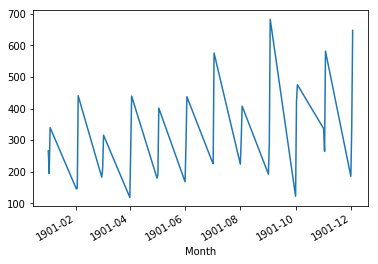

In [6]:
series.plot()
pyplot.show()

In [8]:
arima_model = ARIMA(series, order=(5,1,0))
fit = arima_model.fit()

C:\Users\win10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\win10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\win10\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\win10\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWa

In [9]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          ARIMA Model Results                                          
=======================================================================================================
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sun, 21 Jul 2019   AIC                            406.340
Time:                                                 05:40:27   BIC                            417.227
Sample:                                                      1   HQIC                           410.098
                                                                                                       
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales of shampoo over a three year period    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales of shampoo over a three year period    -0.6203      0.282     -2.203      0.036      -1.172      -0.068
ar.L3.D.Sales of shampoo over a three year period    -0.3606      0.295     -1.222      0.231      -0.939       0.218
ar.L4.D.Sales of shampoo over a three year period    -0.1252      0.280     -0.447      0.658      -0.674       0.424
ar.L5.D.Sales of shampoo over a three year period     0.1289      0.191      0.673      0.506      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

In [10]:
X = series.values
X

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [11]:
size = int(len(X) * 0.66)

In [12]:
train, test = X[0:size], X[size:len(X)]

In [13]:
history = [x for x in train]

In [14]:
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Users\win10\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\win10\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\win10\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

predicted=349.117712, expected=342.300000
predicted=306.512952, expected=339.700000
predicted=387.376449, expected=440.400000
predicted=348.154255, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.082087, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737224, expected=575.500000
predicted=434.915402, expected=407.600000
predicted=507.923547, expected=682.000000
predicted=435.482779, expected=475.300000
predicted=652.743826, expected=581.300000
predicted=546.343519, expected=646.900000
Test MSE: 6958.324


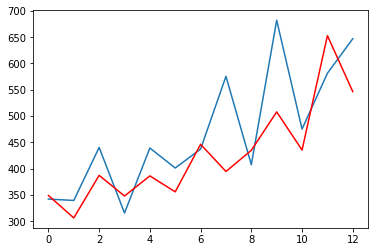

In [15]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()